# Project : Wrangle and Analyze Data

## Data Gathering

In [1]:
#import neccessary libraries
import requests
import pandas as pd
import numpy as np
import json
import tweepy, configparser
from tweepy import OAuthHandler
from timeit import default_timer as timer

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# import the downloaded file using pandas
twitter_archive = pd.read_csv(r'C:\Users\vanes\OneDrive\Desktop\DS Resources\Excel Files\twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects=True)

In [4]:
# open an empty file to write the contents of the website using the url
with open('image_prediction.tsv', 'wb') as f:
    f.write(response.content)

In [5]:
# read the contents of the file 
image_pred = pd.read_csv('image_prediction.tsv', sep='\t')
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Using the tweet json file provided to create a dataframe.

In [6]:
config = configparser.ConfigParser()
config.read(r'C:\Users\vanes\OneDrive\Documents\config.ini')

['C:\\Users\\vanes\\OneDrive\\Documents\\config.ini']

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = config['twitter']['consumer_key']
consumer_secret = config['twitter']['consumer_secret']
access_token = config['twitter']['access_token']
access_secret = config['twitter']['access_secret']

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            # print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

Querying using the twitter api resulted in an empty text file, so I used what was provided by Udacity.

In [10]:
# create an empty the data in the json file.
list = []

In [11]:
# read the json file line by line, adding the id , favorite count and retweet count to the empty list created
with open(r'C:\Users\vanes\OneDrive\Desktop\Projects- ALX-T\tweet_json.txt', 'r') as file:
    for line in file:
        row = json.loads(line)
        id = row['id']
        fav_count = row['favorite_count']
        retweet_count = row['retweet_count']
        
        list.append({'tweet_id' : id,  'favorite_count': fav_count, 'retweet_count' : retweet_count})       

In [12]:
# convert the list to a dataframe
tweet = pd.DataFrame(list, columns = ['tweet_id','favorite_count', 'retweet_count'])
tweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Assessing Data

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

### Quality issues
1. Drop 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source' and 'extended url' columns in twitter_archive table.

2. Tweet_id column in all tables should be strings not integers.

3. Drop jpg_url in image_pred table.

4. Capitalize and rename name column in twitter_archive table 

5. Make values in p1, p2 and p3 columns lowercase.

6. Timestamp column should be datetime instead of object. 

7. There should one denominator in the rating_denominator column, which is 10.

8. Filter for only original tweets.

### Tidiness issues
1. Doggo, floofer, pupper and puppo should be in one column as a dog type.
2. The datasets are related to tweets and should be merged. Favorite count and retweet count in tweet df should be part of twitter_archive table.

## Cleaning Data

In [18]:
# make copies of the original datasets 
ta_copy = twitter_archive.copy()
ip_copy = image_pred.copy()
tweet_copy = tweet.copy()

## Quality 
## Issue #1:
Drop 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source' and 'extended url' columns in **twitter_archive** table.

In [19]:
# use pandas .drop() method to drop columns in the twitter_archive copy table. 
ta_copy.drop(['in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source', 
              'expanded_urls'], axis = 1, inplace = True)

In [20]:
# checking to see if the code produce the right outcome.
ta_copy.head(1)

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None


## Issue #2:
Tweet_id column in all tables should be strings not integers.

In [21]:
# convert the column tweet_id from integers to strings
ta_copy['tweet_id'] = ta_copy['tweet_id'].astype(str)

In [22]:
ip_copy['tweet_id'] = ip_copy['tweet_id'].astype(str)

In [23]:
tweet_copy['tweet_id'] = tweet_copy['tweet_id'].astype(str)

In [24]:
# check the outcome of the code
ta_copy['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [25]:
ta_copy['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [26]:
tweet_copy['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2354 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


## Issue #3:
Drop jpg_url in image_pred table.

In [27]:
# drop the column jpg_url
ip_copy.drop(['jpg_url'], axis=1, inplace=True)

In [28]:
ip_copy.head(1)

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


## Issue #4:
Capitalize and rename name column in twitter_archive table

In [29]:
# use the .capitalize() function in pandas to iterate through the whole column to make changes
ta_copy.name = ta_copy.name.str.capitalize()

In [30]:
# check 
ta_copy.name.tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'Such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'A',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

In [31]:
# use pandas .rename() function to rename
ta_copy.rename(columns = {'name' : 'dog_name'}, inplace = True)

In [32]:
ta_copy.head(1)

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None


## Issue #5:
Make values in p1, p2 and p3 columns lowercase.

In [33]:
# convert values in columns to lowercase using str.lower()
ip_copy.p1 = ip_copy.p1.str.lower()

In [34]:
ip_copy.p2 = ip_copy.p2.str.lower()

In [35]:
ip_copy.p3 = ip_copy.p3.str.lower()

In [36]:
ip_copy

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


## Issue #6:
Timestamp column should be datetime instead of object.

In [37]:
# convert timestamp column to datetime
ta_copy['timestamp'] = pd.to_datetime(ta_copy['timestamp'])

In [38]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   timestamp              2356 non-null   datetime64[ns, UTC]
 3   text                   2356 non-null   object             
 4   retweeted_status_id    181 non-null    float64            
 5   rating_numerator       2356 non-null   int64              
 6   rating_denominator     2356 non-null   int64              
 7   dog_name               2356 non-null   object             
 8   doggo                  2356 non-null   object             
 9   floofer                2356 non-null   object             
 10  pupper                 2356 non-null   object             
 11  puppo                  2356 non-null   object           

## Issue #7:
There should one denominator in the rating_denominator column, which is 10.

In [39]:
# change the existing values in rating_denominator column by assigning the column to 10
ta_copy.rating_denominator = 10

In [40]:
ta_copy.rating_denominator.unique()

array([10], dtype=int64)

## Issue #8:
Filter for only original tweets.

In [41]:
#get rows where retweeted_status_id is not null
retweets = (~ta_copy.retweeted_status_id.isnull())

In [42]:
#remove them from the dataframe
ta_copy = ta_copy[~retweets]
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   timestamp              2175 non-null   datetime64[ns, UTC]
 3   text                   2175 non-null   object             
 4   retweeted_status_id    0 non-null      float64            
 5   rating_numerator       2175 non-null   int64              
 6   rating_denominator     2175 non-null   int64              
 7   dog_name               2175 non-null   object             
 8   doggo                  2175 non-null   object             
 9   floofer                2175 non-null   object             
 10  pupper                 2175 non-null   object             
 11  puppo                  2175 non-null   object           

In [43]:
#get rows where in_reply_to_status_id is not null
replies = (~ta_copy.in_reply_to_status_id.isnull())

In [44]:
#remove them from the dataframe
ta_copy = ta_copy[~replies]

In [45]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2097 non-null   object             
 1   in_reply_to_status_id  0 non-null      float64            
 2   timestamp              2097 non-null   datetime64[ns, UTC]
 3   text                   2097 non-null   object             
 4   retweeted_status_id    0 non-null      float64            
 5   rating_numerator       2097 non-null   int64              
 6   rating_denominator     2097 non-null   int64              
 7   dog_name               2097 non-null   object             
 8   doggo                  2097 non-null   object             
 9   floofer                2097 non-null   object             
 10  pupper                 2097 non-null   object             
 11  puppo                  2097 non-null   object           

In [46]:
# drop columns
ta_copy.drop(['in_reply_to_status_id', 'retweeted_status_id'], axis = 1, inplace = True)
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   dog_name            2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 180.2+ KB


## Tidiness
## Issue #1:
Doggo, floofer, pupper and puppo should be in one column as a dog type.

In [47]:
# create function change all None values to NaN
def null(value):
    if value == 'None':
        value = np.NaN
    return value

In [48]:
# use function created above to change value to NaN
ta_copy['doggo'] = [null(value) for value in ta_copy['doggo']]
ta_copy['floofer'] = [null(value) for value in ta_copy['floofer']]
ta_copy['pupper'] = [null(value) for value in ta_copy['pupper']]
ta_copy['puppo'] = [null(value) for value in ta_copy['puppo']]

In [49]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   dog_name            2097 non-null   object             
 6   doggo               83 non-null     object             
 7   floofer             10 non-null     object             
 8   pupper              230 non-null    object             
 9   puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 180.2+ KB


In [50]:
# create a new column using combined values from all four columns
ta_copy['dog_type'] = ta_copy.doggo.fillna(ta_copy.floofer.fillna(ta_copy.pupper.fillna(ta_copy.puppo)))

In [51]:
ta_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [52]:
ta_copy.dog_type.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_type, dtype: int64

In [53]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   dog_name            2097 non-null   object             
 6   doggo               83 non-null     object             
 7   floofer             10 non-null     object             
 8   pupper              230 non-null    object             
 9   puppo               24 non-null     object             
 10  dog_type            336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 196.6+ KB


In [54]:
# drop doggo, floofer, pupper and puppo columns
ta_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [55]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   dog_name            2097 non-null   object             
 6   dog_type            336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 131.1+ KB


## Issue #2:
The datasets are related to tweets and should be merged. Favorite count and retweet count in tweet df should be part of twitter_archive table.

In [80]:
# # join the two tables using merge function with their common attribute 'tweet_id'
# combined_ta = pd.merge(ta_copy, tweet_copy, on = ['tweet_id'], how = 'left')
# combined_ta.head()

Create a master file by merging all the dataframes using the tweet_id column.

In [81]:
twitter_archive_master = ta_copy.merge(tweet_copy, on='tweet_id').merge(ip_copy, on = 'tweet_id')
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_name,dog_type,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,39467,8853,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,33819,6514,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,25461,4328,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,42908,8964,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,41048,9774,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Storing Data
Save the final dataframe as a master csv file

In [82]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, I'll analyse and visualize my gathered and cleaned dataset.

In [83]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   text                1971 non-null   object             
 3   rating_numerator    1971 non-null   int64              
 4   rating_denominator  1971 non-null   int64              
 5   dog_name            1971 non-null   object             
 6   dog_type            303 non-null    object             
 7   favorite_count      1971 non-null   int64              
 8   retweet_count       1971 non-null   int64              
 9   img_num             1971 non-null   int64              
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

In [84]:
twitter_archive_master.retweet_count.max()

79515

In [85]:
twitter_archive_master.favorite_count.max()

132810

 Checking how accurate the model prediction is for the image prediction dataframe

In [86]:
# count the number of Trues and False
twitter_archive_master.p1_dog.value_counts()

True     1463
False     508
Name: p1_dog, dtype: int64

In [87]:
twitter_archive_master.p2_dog.value_counts()

True     1480
False     491
Name: p2_dog, dtype: int64

In [88]:
twitter_archive_master.p3_dog.value_counts()

True     1431
False     540
Name: p3_dog, dtype: int64

In [89]:
twitter_archive_master.p1_dog.mean()

0.7422628107559615

In [90]:
twitter_archive_master.p2_dog.mean()

0.7508878741755454

In [91]:
twitter_archive_master.p3_dog.mean()

0.726027397260274

In [92]:
greater_10 = twitter_archive_master.query('rating_numerator > 10')
greater_10.shape[0]

1142

In [93]:
less_10 = twitter_archive_master.query('rating_numerator <= 10')
less_10.shape[0]

829

### Insights:
1. The highest retweet count for WeRateDog's tweet is about half the highest favorite count.

2. The model has about 0.7 accuracy.

3. More than half of the tweets is rate over 10, a good amount of dogs have good ratings.

## Visualization

In [94]:
# find the number of dogs in each dog type category
types = twitter_archive_master.dog_type.value_counts()

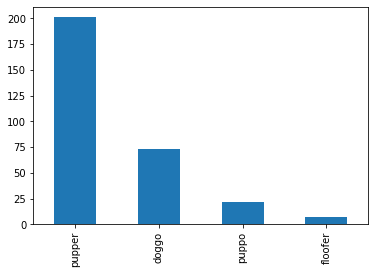

In [95]:
types.plot(kind='bar');

From these graphs, it can be deduced that pupper has the highest count. There are more pupper than other dog types in the dataset.